In [143]:
import numpy as np
import pandas as pd

In [144]:
df = pd.read_csv('/content/Automobile_data.csv')
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [145]:
# df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
lb = LabelEncoder()

In [148]:
df['normalized-losses'] = lb.fit_transform(df['normalized-losses'])
df['make'] = lb.fit_transform(df['make'])
df['fuel-type'] = lb.fit_transform(df['fuel-type'])
df['aspiration'] = lb.fit_transform(df['aspiration'])
df['num-of-doors'] = lb.fit_transform(df['num-of-doors'])
df['body-style'] = lb.fit_transform(df['body-style'])
df['drive-wheels'] = lb.fit_transform(df['drive-wheels'])
df['engine-location'] = lb.fit_transform(df['engine-location'])
df['engine-type'] = lb.fit_transform(df['engine-type'])
df['num-of-cylinders'] = lb.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = lb.fit_transform(df['fuel-system'])
df['bore'] = lb.fit_transform(df['bore'])
df['stroke'] = lb.fit_transform(df['stroke'])
df['horsepower'] = lb.fit_transform(df['horsepower'])
df['peak-rpm'] = lb.fit_transform(df['peak-rpm'])
df['price'] = lb.fit_transform(df['price'])

In [149]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,31
1,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,50


In [150]:
x = df.drop(columns = ['price'])
y = df['price']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lr = LinearRegression()

In [155]:
lr.fit(x_train, y_train)

LinearRegression()

In [156]:
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

In [157]:
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.39535387700816726
Test Score: 0.12810521903153926


In [158]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [159]:
ri = Ridge(alpha=1.0)
ls = Lasso(alpha=0.1)

In [160]:
ri.fit(x_train,y_train)

Ridge()

In [161]:
y_pred = lr.predict(x_test)

In [162]:
r2_score(y_test, y_pred)

0.12810521903153926

In [163]:
ls.fit(x_train,y_train)

Lasso(alpha=0.1)

In [164]:
y_pred = ls.predict(x_test)

In [165]:
r2_score(y_test, y_pred)

0.15224125934221633

In [166]:
# df = pd.read_csv('/content/Automobile_data.csv')

In [167]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,31
1,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,50


In [168]:
# df.dtypes

In [169]:
df = df.drop(columns = ['symboling','normalized-losses','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg'])

In [170]:
df.head(2)

,make,price
0,0,31
1,0,50


In [171]:
x = df.iloc[:,[0,1]].values

In [172]:
from sklearn.cluster import KMeans

In [173]:
import matplotlib.pyplot as plt

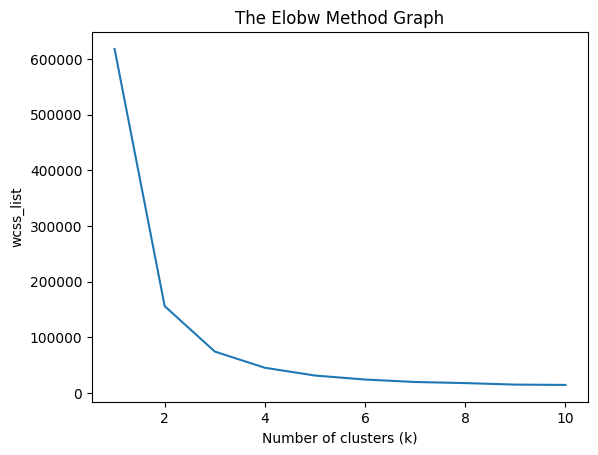

In [174]:
a=[]

for i in range(1,11):
    b = KMeans (n_clusters = i, init = 'k-means++',random_state = 42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range (1,11), a)

plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('wcss_list')
plt.show()


In [175]:
b = KMeans(n_clusters=4, init='k-means++', random_state= 42)
y_predict= b.fit_predict(x)

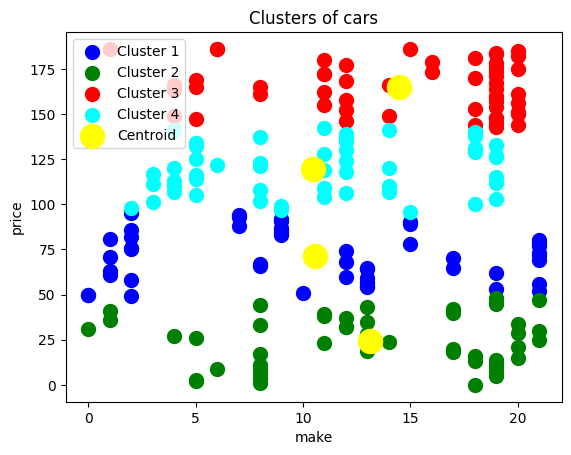

In [176]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100 , c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100 , c = 'green', label = 'Cluster 2')
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label= 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100 , c = 'cyan', label = 'Cluster 4')

plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300 , c = 'yellow',
            label = 'Centroid')
plt.title('Clusters of cars')
plt.xlabel('make')
plt.ylabel('price')
plt.legend()
plt.show()